# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [340]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [247]:
# loading data
data = pd.read_csv("used_device_data.csv")  ## Complete the code to read the data

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [248]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

### Checking the shape of the dataset

In [249]:
data.shape  ## Complete the code to get the shape of data

(3454, 15)

<IPython.core.display.Javascript object>

* The dataset has 3454 rows and 15 columns

### Checking the data types of the columns for the dataset

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* brand_name, os, 4g and 5g are categorical while all others are numerical data types
* main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values
* used_price is the dependant variable

### Statistical summary of the dataset

In [251]:
data.describe(
    include="all"
).T  ## Complete the code to print the statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

* There are 34 different manufacturing brands, 4 different operating systems, 4gs or 5gs have either values yes or no for different phones
* Anroid is the most popular os, with 3214 phones running on the same
* 2335 phones have 4g available 
-The average values for most numerical data types like screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight, new_price and used_price are larger than median values, indicating that data may be skewed right
-The average values and median values are almost similar for amount of RAM in GB, indicating very little skwewness, if any
-The average values for number of days the used/ refurbished phone has been used is less than median value, indicating data maybe skewed left

### Checking for duplicate values

In [252]:
data.duplicated().sum()  ## Complete the code to check duplicate entries in the data

0

<IPython.core.display.Javascript object>

### Checking for missing values

In [253]:
data.isnull().sum()  ## Complete the code to check duplicate entries in the data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [254]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis

In [255]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [341]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`normalized_used_price`**

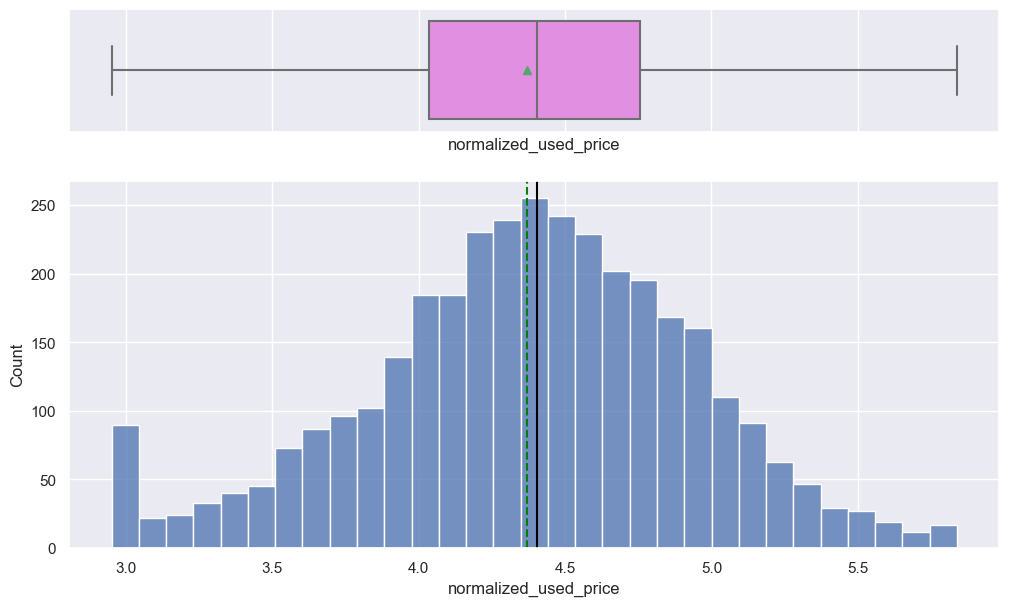

<IPython.core.display.Javascript object>

In [343]:
histogram_boxplot(df, "normalized_used_price")
plt.savefig("normalized_used_price.png", dpi=300, bbox_inches="tight")

**`normalized_new_price`**

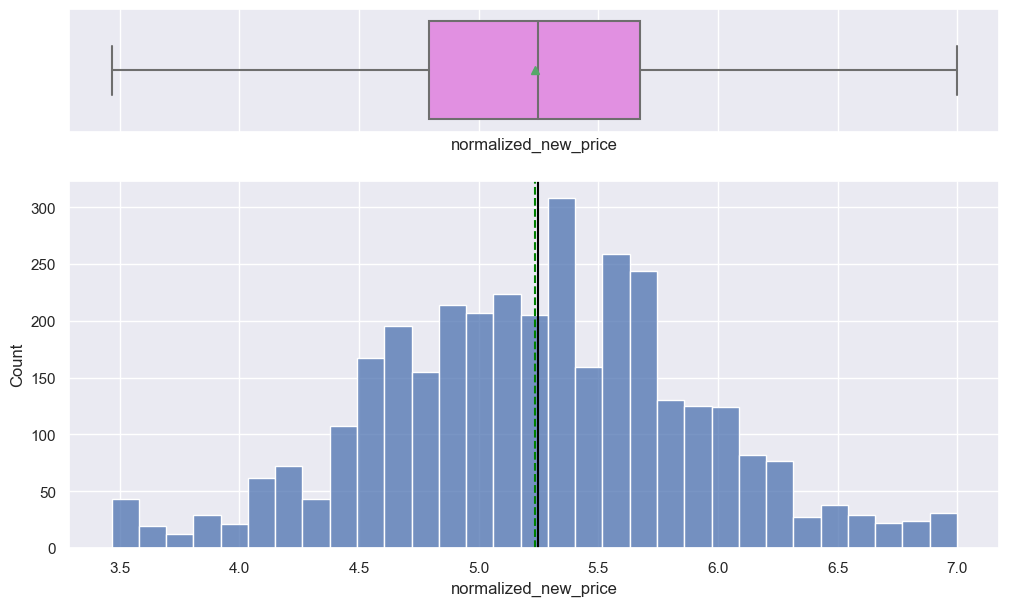

<IPython.core.display.Javascript object>

In [344]:
histogram_boxplot(
    df, "normalized_new_price"
)  ## Complete the code to create histogram_boxplot for 'normalized_new_price'
plt.savefig("normalized_new_price.png", dpi=300, bbox_inches="tight")

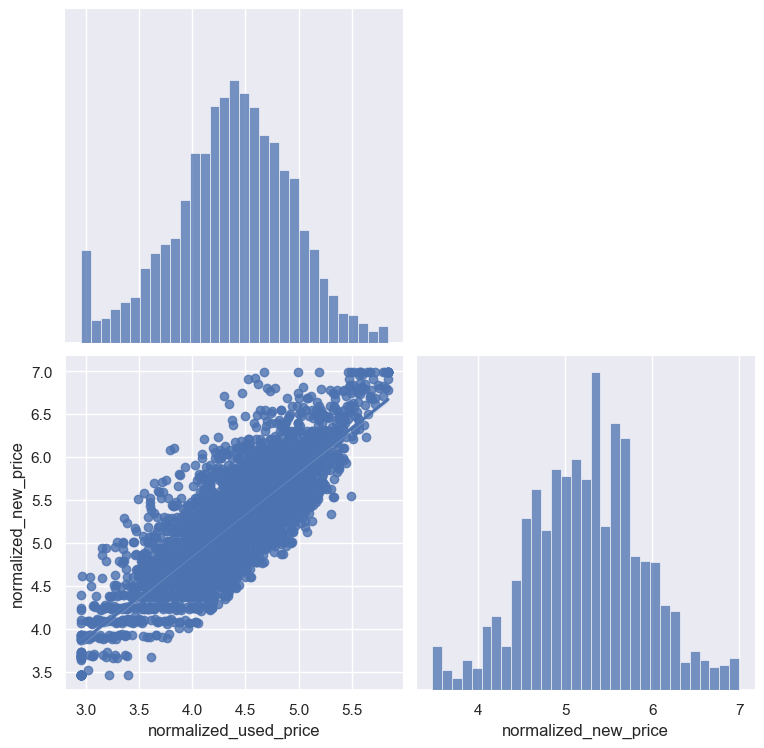

Linear correlation factor between (normalized_used_price) and (normalized_new_price) 0.83


C:\Users\Trisha\AppData\Local\Temp\ipykernel_23004\3517018449.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr()["normalized_used_price"]["normalized_new_price"], 2),


<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [389]:
g = sns.pairplot(
    data=df[["normalized_used_price", "normalized_new_price"]], corner=True, kind="reg"
)
g.fig.set_size_inches(8, 8)
plt.show()
print(
    "Linear correlation factor between (normalized_used_price) and (normalized_new_price)",
    round(df.corr()["normalized_used_price"]["normalized_new_price"], 2),
)
plt.savefig("pairplot.png", dpi=300, bbox_inches="tight")

**`screen_size`**

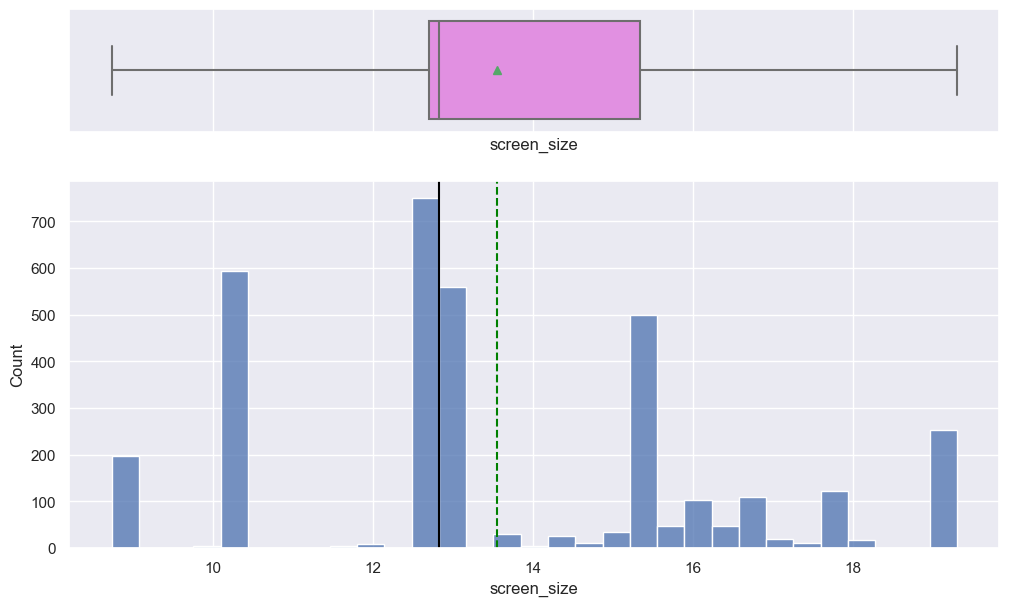

<IPython.core.display.Javascript object>

In [346]:
histogram_boxplot(
    df, "screen_size"
)  ## Complete the code to create histogram_boxplot for 'screen_size'
plt.savefig("screen_size.png", dpi=300, bbox_inches="tight")

**`main_camera_mp`**

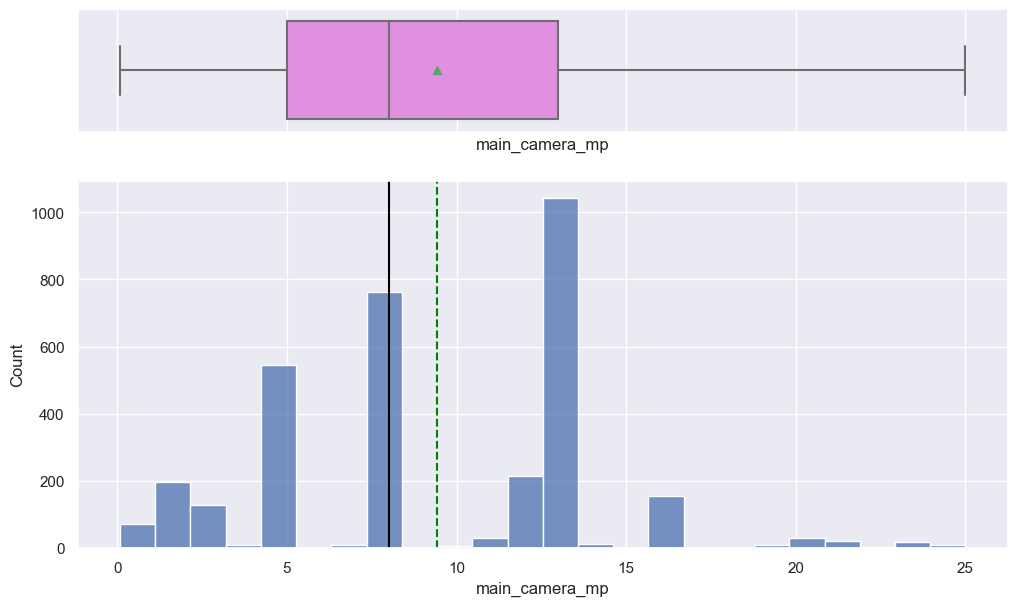

<IPython.core.display.Javascript object>

In [347]:
histogram_boxplot(
    df, "main_camera_mp"
)  ## Complete the code to create histogram_boxplot for 'main_camera_mp'
plt.savefig("main_camera_mp.png", dpi=300, bbox_inches="tight")

**`selfie_camera_mp`**

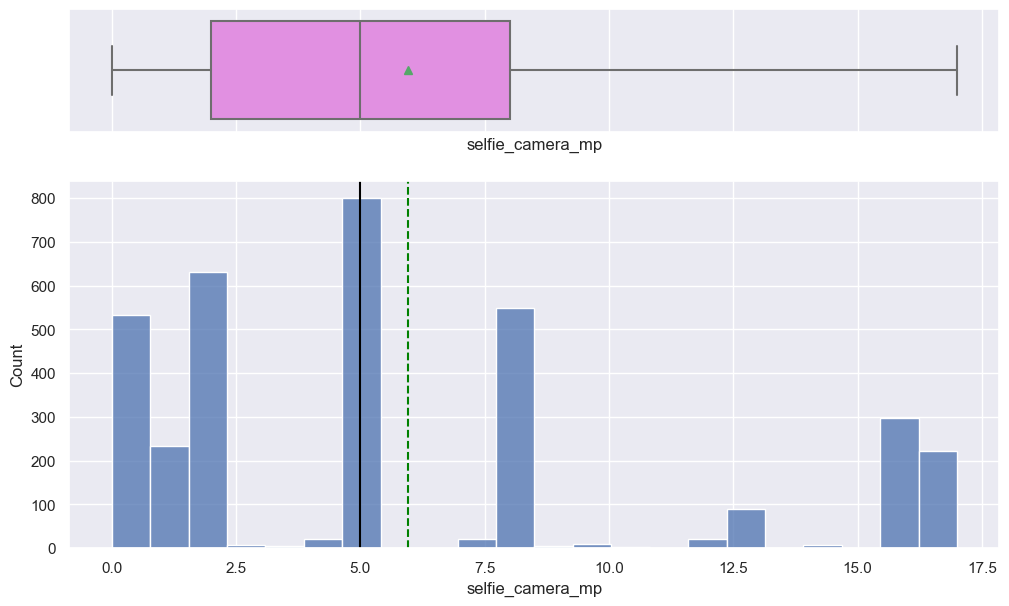

<IPython.core.display.Javascript object>

In [348]:
histogram_boxplot(
    df, "selfie_camera_mp"
)  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'
plt.savefig("selfie_camera_mp.png", dpi=300, bbox_inches="tight")

**`int_memory`**

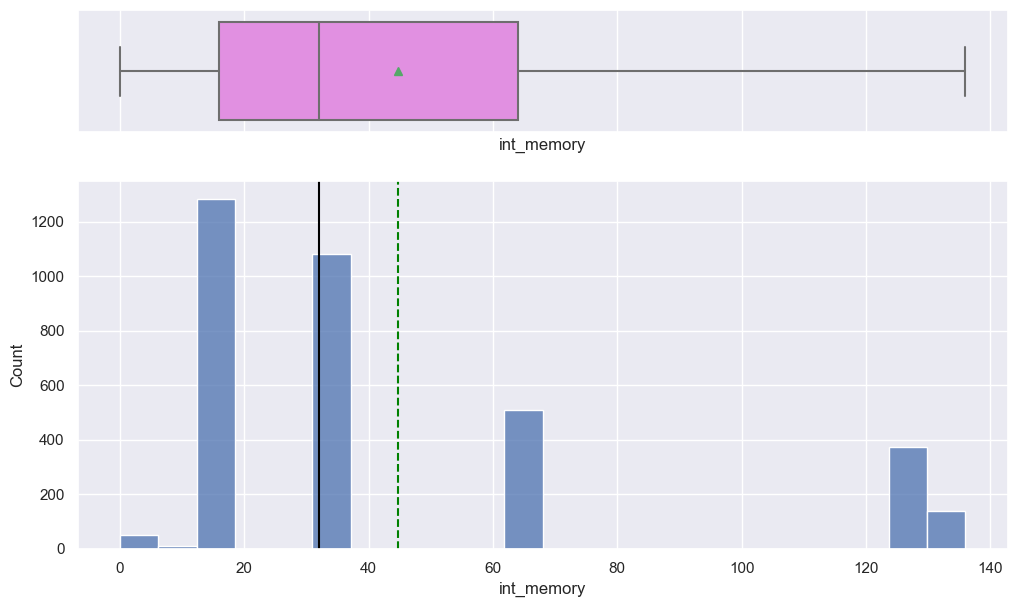

<IPython.core.display.Javascript object>

In [349]:
histogram_boxplot(
    df, "int_memory"
)  ## Complete the code to create histogram_boxplot for 'int_memory'
plt.savefig("int_memory.png", dpi=300, bbox_inches="tight")

**`ram`**

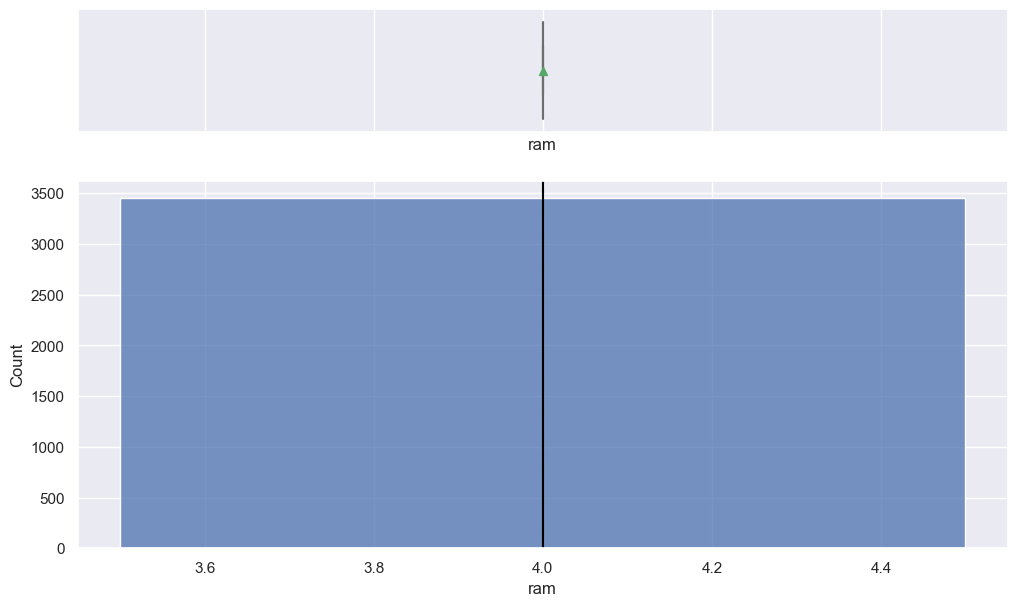

<IPython.core.display.Javascript object>

In [353]:
histogram_boxplot(df, "ram")  ## Complete the code to create histogram_boxplot for 'ram'
plt.savefig("ram.png", dpi=300, bbox_inches="tight")

**`weight`**

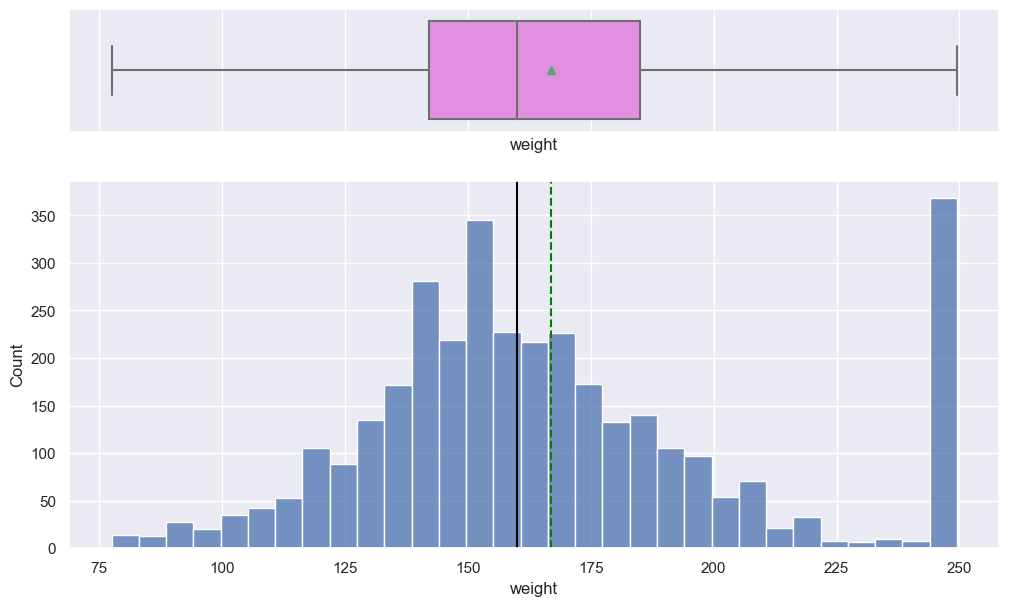

<IPython.core.display.Javascript object>

In [354]:
histogram_boxplot(
    df, "weight"
)  ## Complete the code to create histogram_boxplot for 'weight'
plt.savefig("weight.png", dpi=300, bbox_inches="tight")

**`battery`**

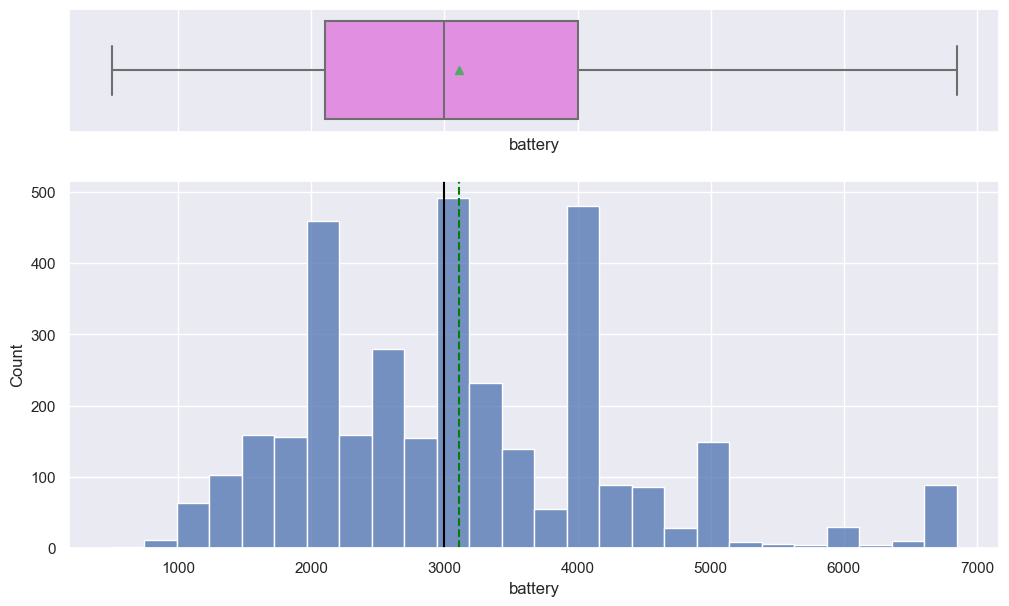

<IPython.core.display.Javascript object>

In [355]:
histogram_boxplot(
    df, "battery"
)  ## Complete the code to create histogram_boxplot for 'battery'
plt.savefig("battery.png", dpi=300, bbox_inches="tight")

**`days_used`**

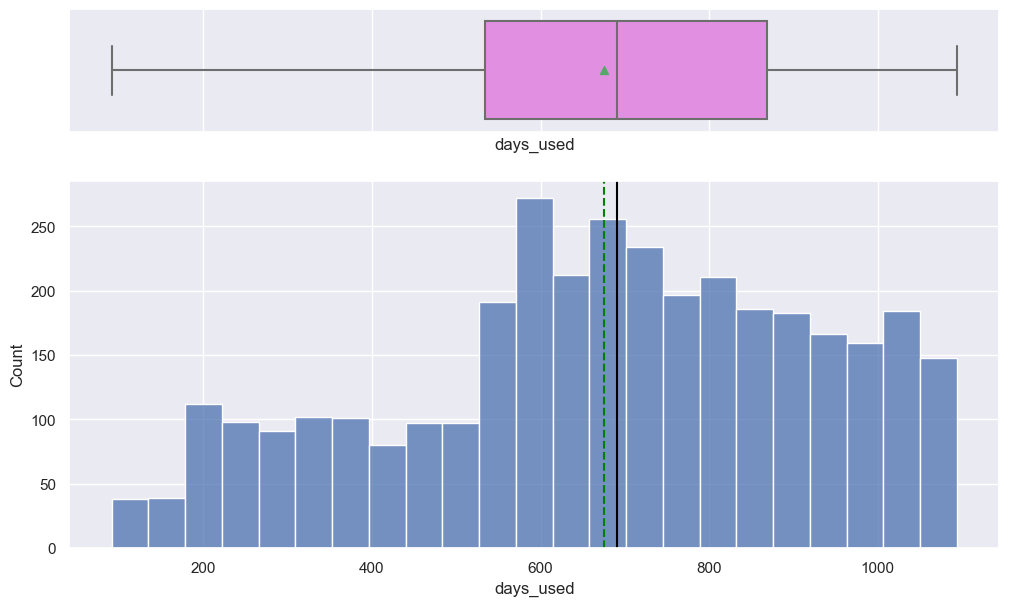

<IPython.core.display.Javascript object>

In [356]:
histogram_boxplot(
    df, "days_used"
)  ## Complete the code to create histogram_boxplot for 'days_used'
plt.savefig("days_used.png", dpi=300, bbox_inches="tight")

**`brand_name`**

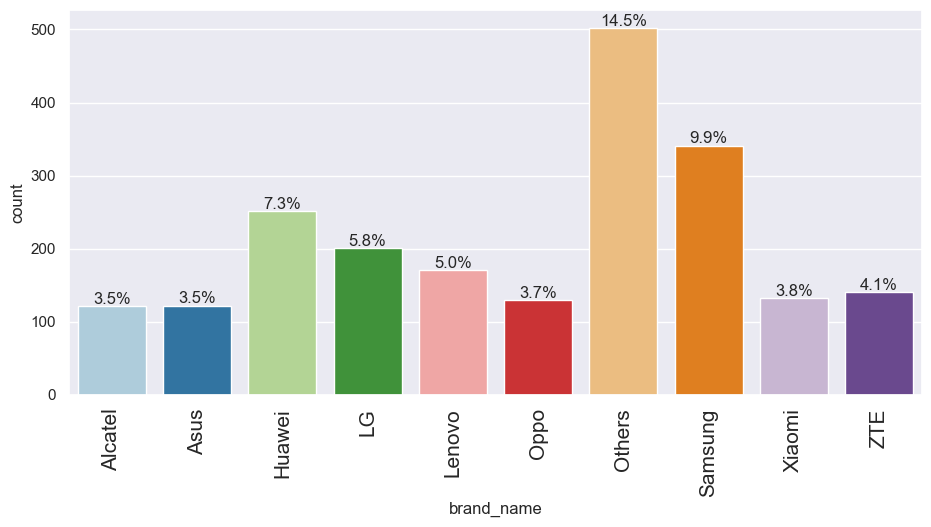

<IPython.core.display.Javascript object>

In [357]:
labeled_barplot(df, "brand_name", perc=True, n=10)
plt.savefig("barplot_brand_name.png", dpi=300, bbox_inches="tight")

**`os`**

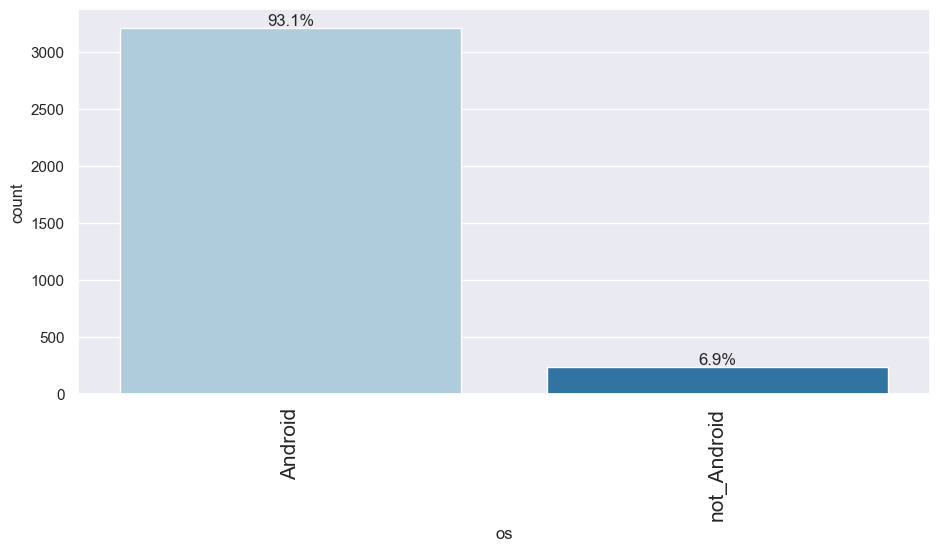

<IPython.core.display.Javascript object>

In [358]:
labeled_barplot(
    df, "os", perc=True, n=10
)  ## Complete the code to create labeled_barplot for 'os'

* More than 90% of the used phone market is dominated by andorid devices

In [270]:
# since android is clearly dominating the os market, we can group others, windows and iOS together
# as a category- "not_Android"

df.loc[df.os == "Others", "os"] = "not_Android"
df.loc[df.os == "Windows", "os"] = "not_Android"
df.loc[df.os == "iOS", "os"] = "not_Android"

<IPython.core.display.Javascript object>

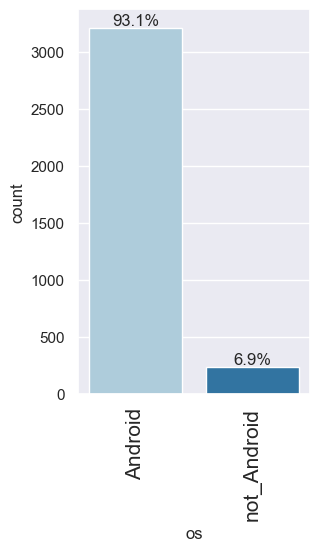

<IPython.core.display.Javascript object>

In [359]:
labeled_barplot(df, "os", perc=True)
plt.savefig("barplot_os.png", dpi=300, bbox_inches="tight")

**`4g`**

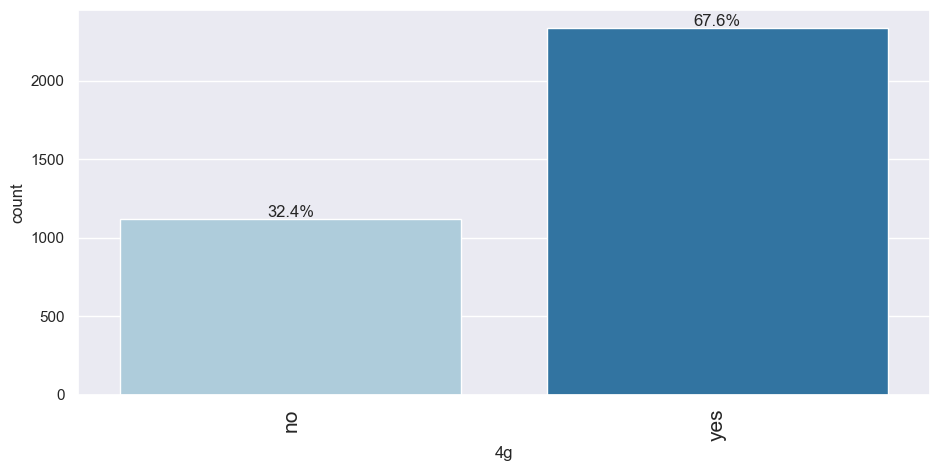

<IPython.core.display.Javascript object>

In [360]:
labeled_barplot(
    df, "4g", perc=True, n=10
)  ## Complete the code to create labeled_barplot for '4g'
plt.savefig("barplot_4g.png", dpi=300, bbox_inches="tight")

**`5g`**

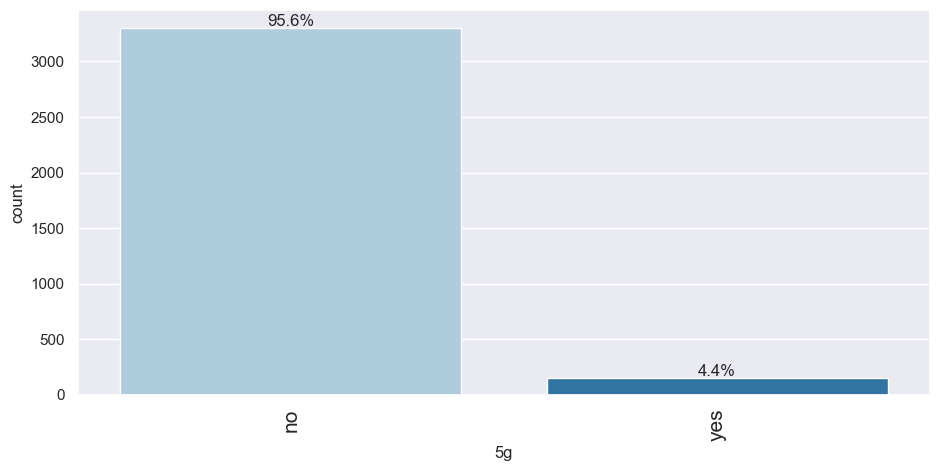

<IPython.core.display.Javascript object>

In [361]:
labeled_barplot(
    df, "5g", perc=True, n=10
)  ## Complete the code to create labeled_barplot for '5g'
plt.savefig("barplot_5g.png", dpi=300, bbox_inches="tight")

**`release_year`**

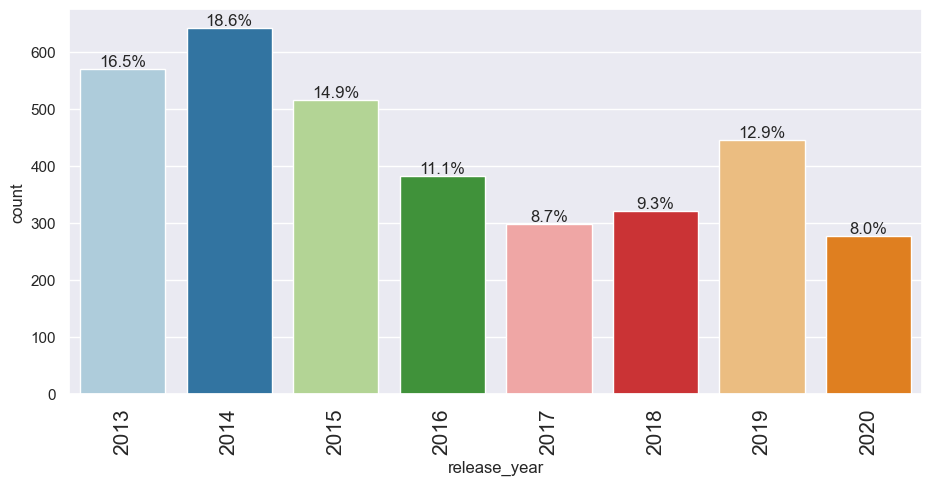

<IPython.core.display.Javascript object>

In [362]:
labeled_barplot(
    df, "release_year", perc=True, n=10
)  ## Complete the code to create labeled_barplot for 'release_year'
plt.savefig("barplot_release_year.png", dpi=300, bbox_inches="tight")

##### Bivariate Analysis

**Correlation Check**

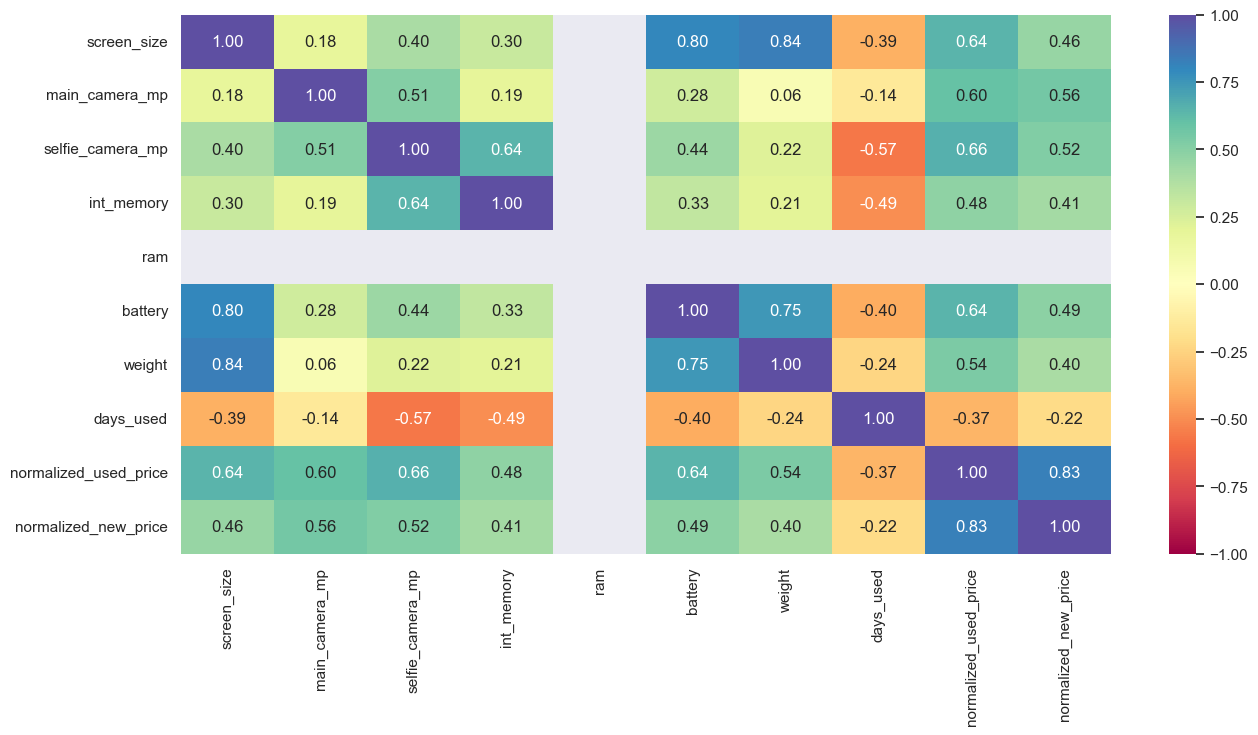

<IPython.core.display.Javascript object>

In [363]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# plt.show()
plt.savefig("correlation.png", dpi=300, bbox_inches="tight")

* days_used and selfie_camera_mp are negatively correlated with battery (-0.55 and -0.37 respectively)
* normalised_used_price and normalised_new_price are strongly-positively correlated with battery and weight respectively (with 0.83 and 0.81 values respectively)
* used_price and cbrt(used_price) are moderately-positively correlated with selfie_camera (0.61), main_camera (0.59), screen_size (0.61), battery (0.61)


**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

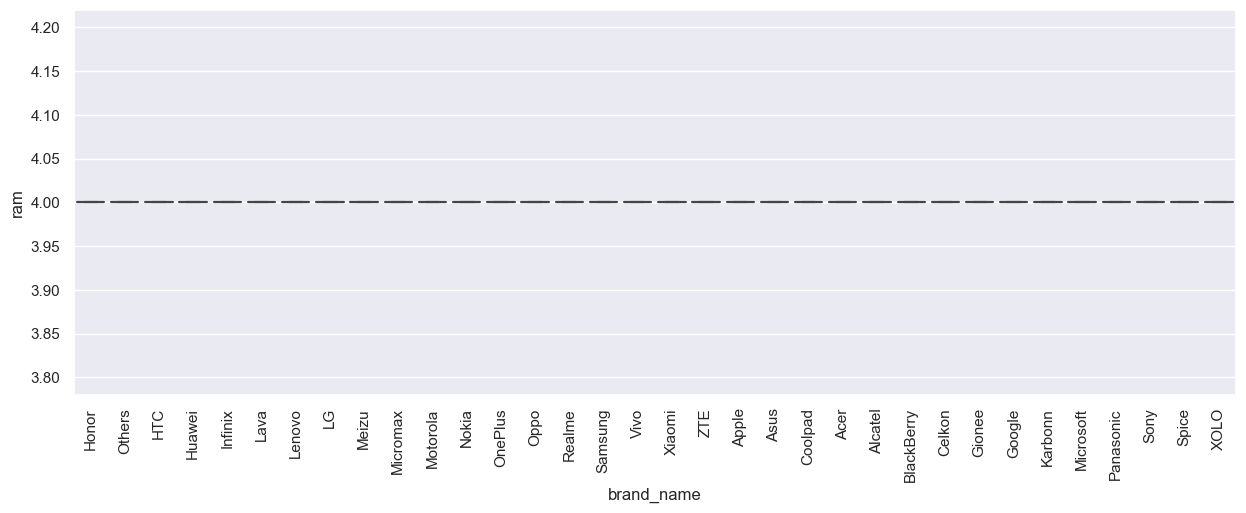

<IPython.core.display.Javascript object>

In [367]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.savefig("boxplot_brand_name_ram.png", dpi=300, bbox_inches="tight")

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [277]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

<IPython.core.display.Javascript object>

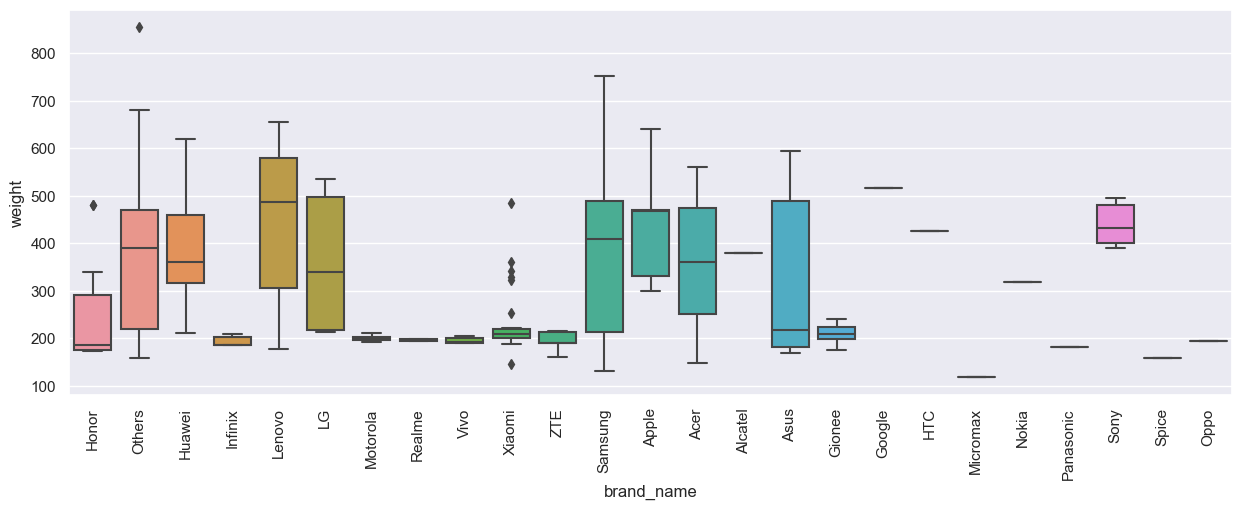

<IPython.core.display.Javascript object>

In [369]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data=df_large_battery, x="brand_name", y="weight"
)  ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.savefig("boxplot_brand_name_weight.png", dpi=300, bbox_inches="tight")

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [279]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

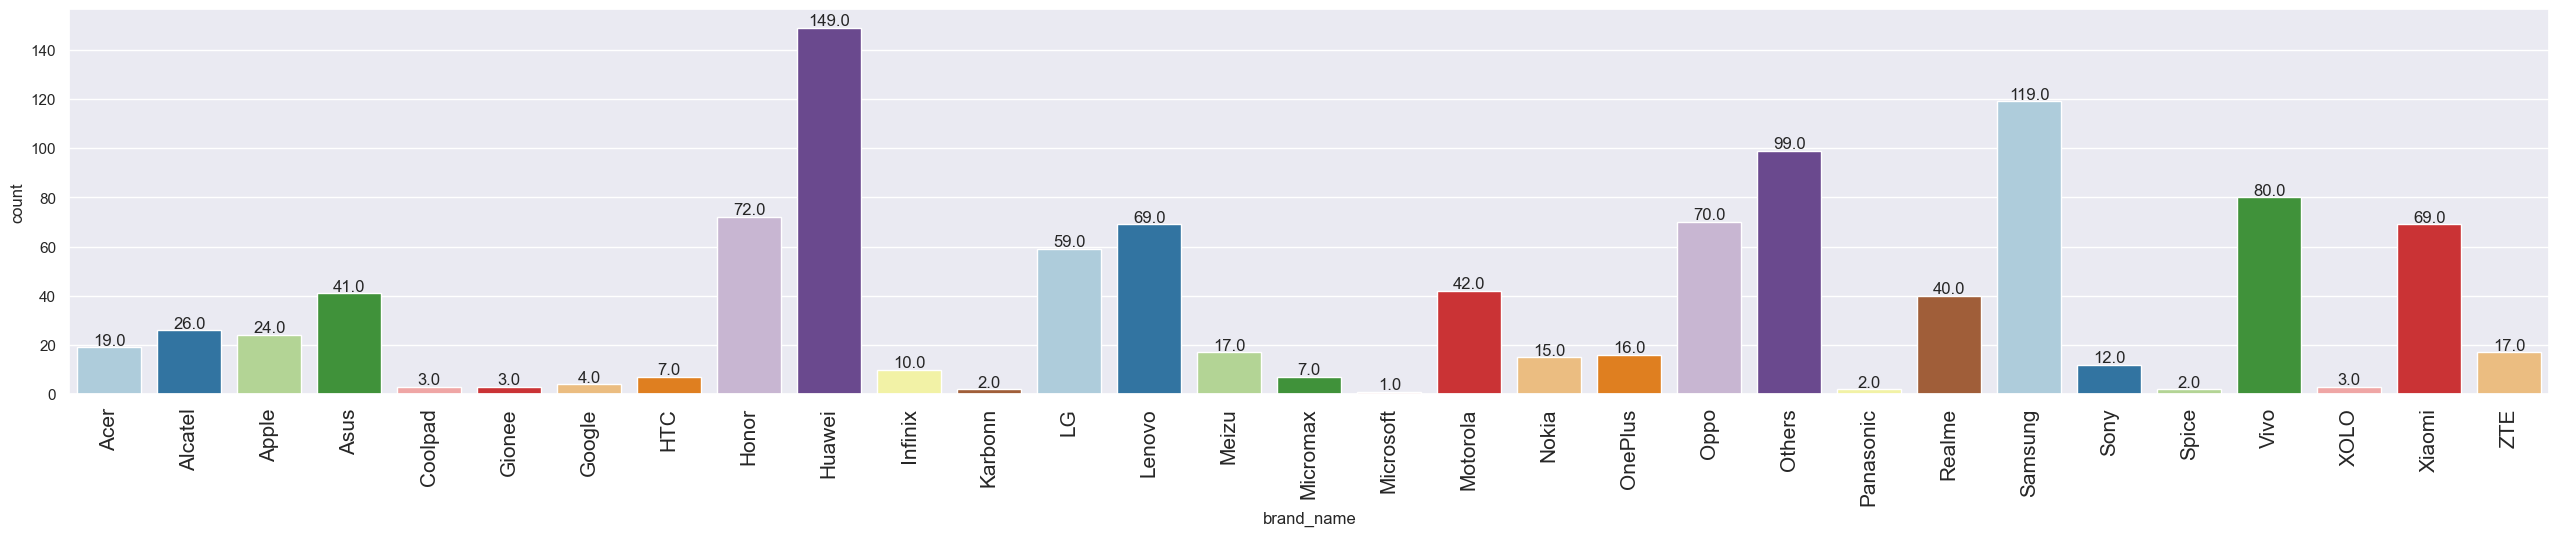

<IPython.core.display.Javascript object>

In [371]:
labeled_barplot(
    df_large_screen, "brand_name"
)  ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe
plt.savefig("barplot_brand_name_large_screen.png", dpi=300, bbox_inches="tight")

* Huawei has the highest number of refurbished phones with large screen (i.e. 149 phones), followed by Samsung (119 phones), Honor (72 phones), Vivo (80 phones), Xiaomi (69 phones) and Oppo (70 phones) among known manufacturing brands
* Microsoft (1 phone), Karbonn/Panasonic/Spice (2 phones) have the lowest number of refurbished phones with large screen size

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [281]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<IPython.core.display.Javascript object>

* There are 655 refurbished phones with great selfie cameras (i.e. > 8MP)

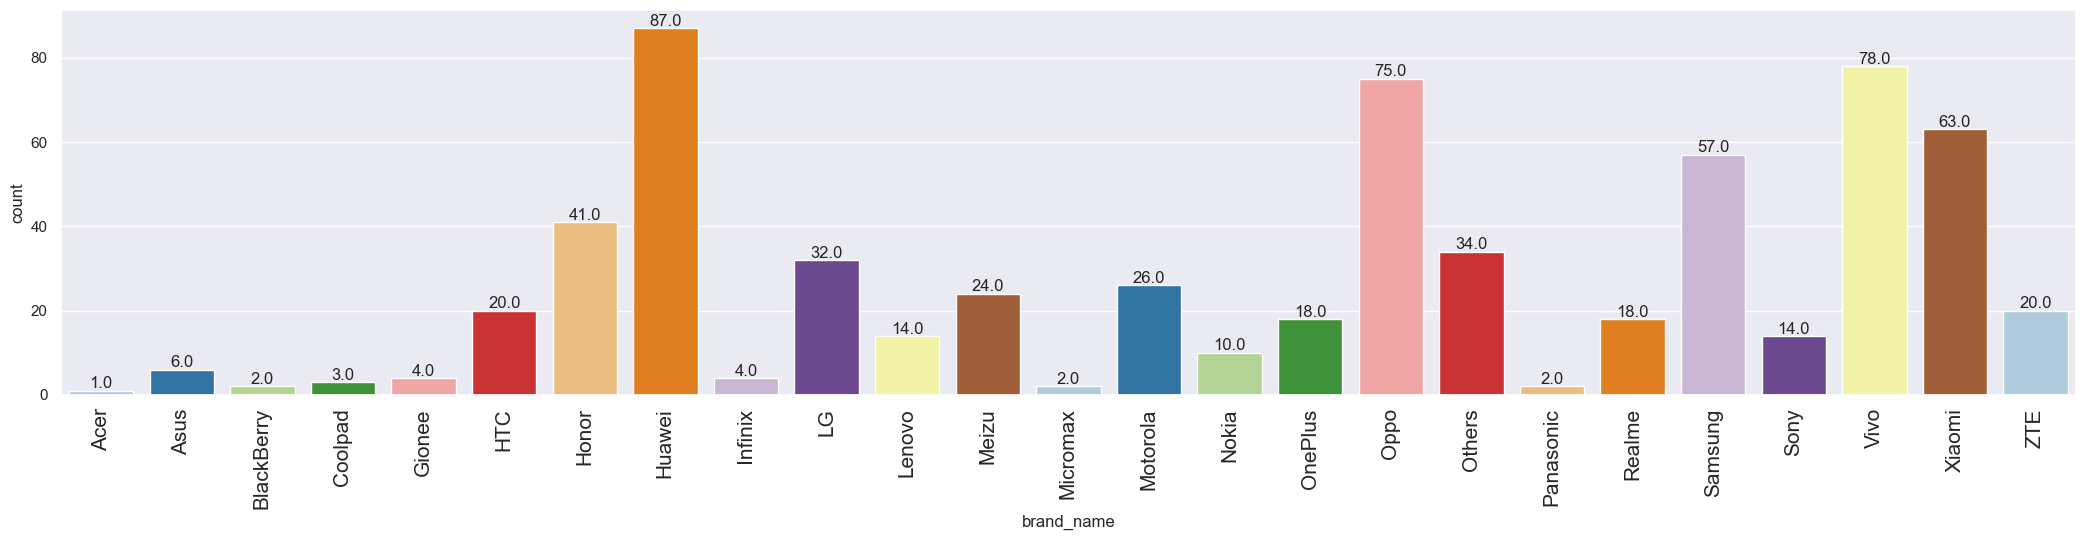

<IPython.core.display.Javascript object>

In [372]:
labeled_barplot(
    df_selfie_camera, "brand_name"
)  ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe
plt.savefig("barplot_brand_name_selfie_camera.png", dpi=300, bbox_inches="tight")

* Huawei (87 phones), Oppo (75 phones), Vivo (78 phones), Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size
* Acer (1 phone), Blackberry/Microsoft/Panasonic (2 phones) have some of the lowest number of refurbished phones with a great selfie camera (>8MP)

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [283]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<IPython.core.display.Javascript object>

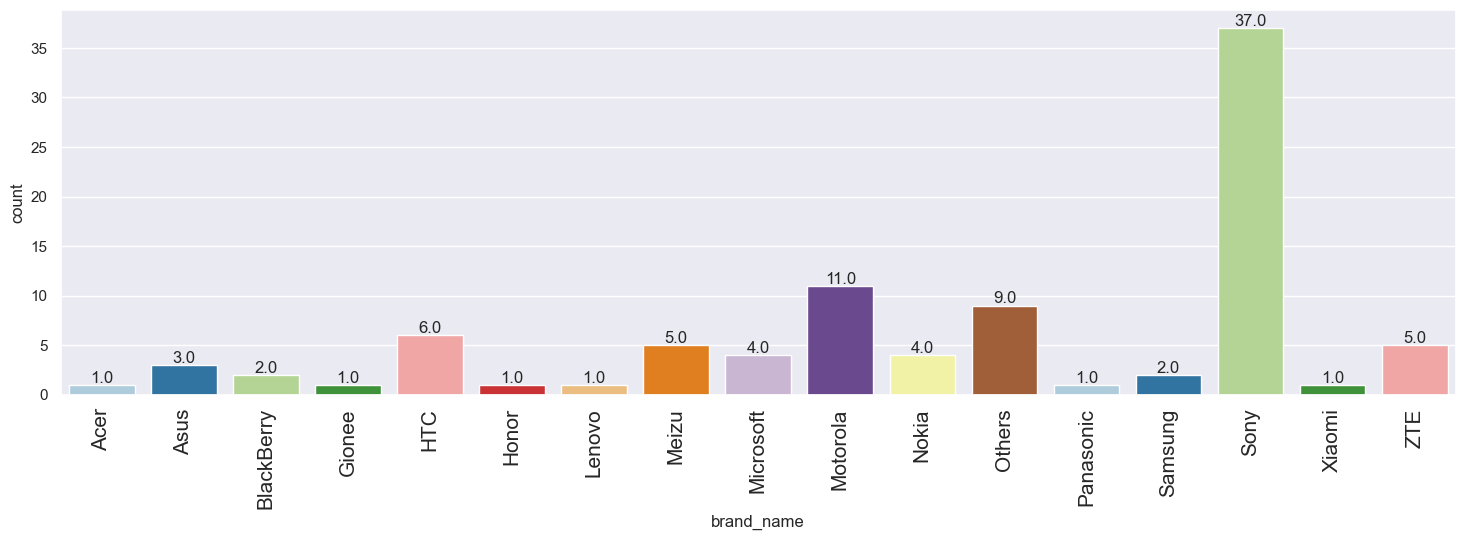

<IPython.core.display.Javascript object>

In [373]:
labeled_barplot(
    df_main_camera, "brand_name"
)  ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe
plt.savefig("barplot_brand_name_main_camera.png", dpi=300, bbox_inches="tight")

* Only Sony (57 phones) have the highest number of refurbished phones with a great main camera (>8MP) - similar brand names observed as for phones with large screen size

In [285]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

**Let's see how the price of used devices varies across the years.**

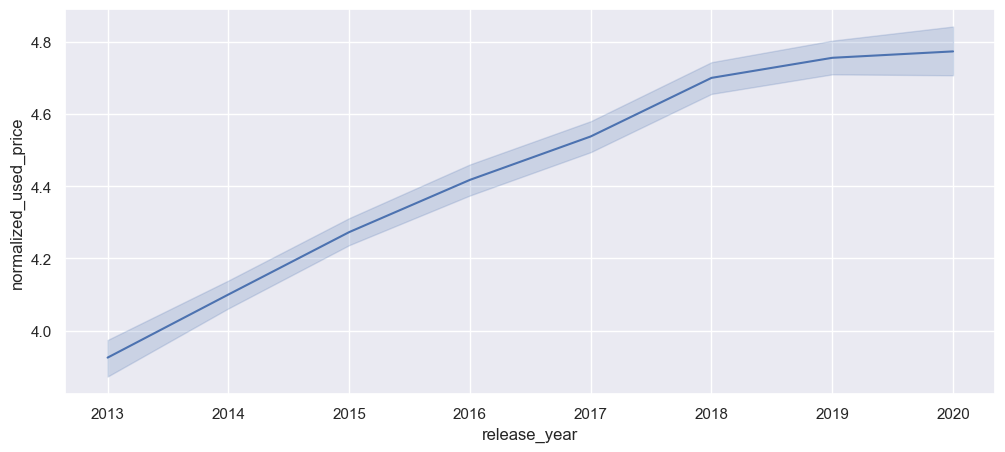

<IPython.core.display.Javascript object>

In [374]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=data, x="release_year", y="normalized_used_price"
)  ## Complete the code to create a lineplot for release year and used price
plt.savefig(
    "lineplot_release_year_normalized_used_price.png", dpi=300, bbox_inches="tight"
)

* Price increases with every year

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

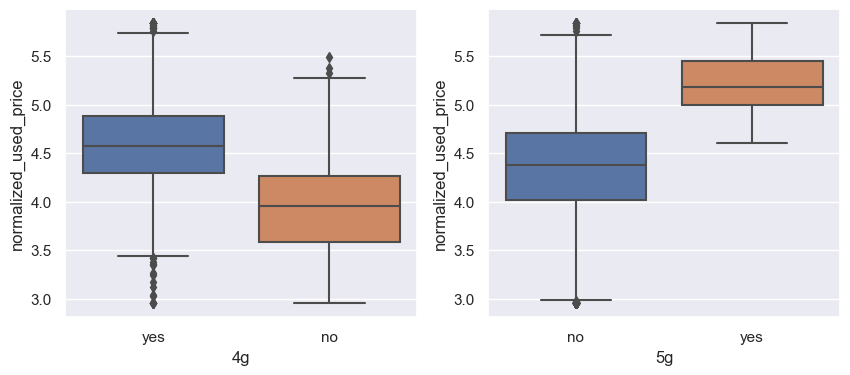

<IPython.core.display.Javascript object>

In [375]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.savefig("boxplot_4g_5g.png", dpi=300, bbox_inches="tight")

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [288]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [289]:
# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values in all the columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [290]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )  ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values after imputing the above columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [291]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )  ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values after imputing the above columns

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [292]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    df1["main_camera_mp"].median()
)  ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [293]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

### Outlier Check



- Let's check for outliers in the data.

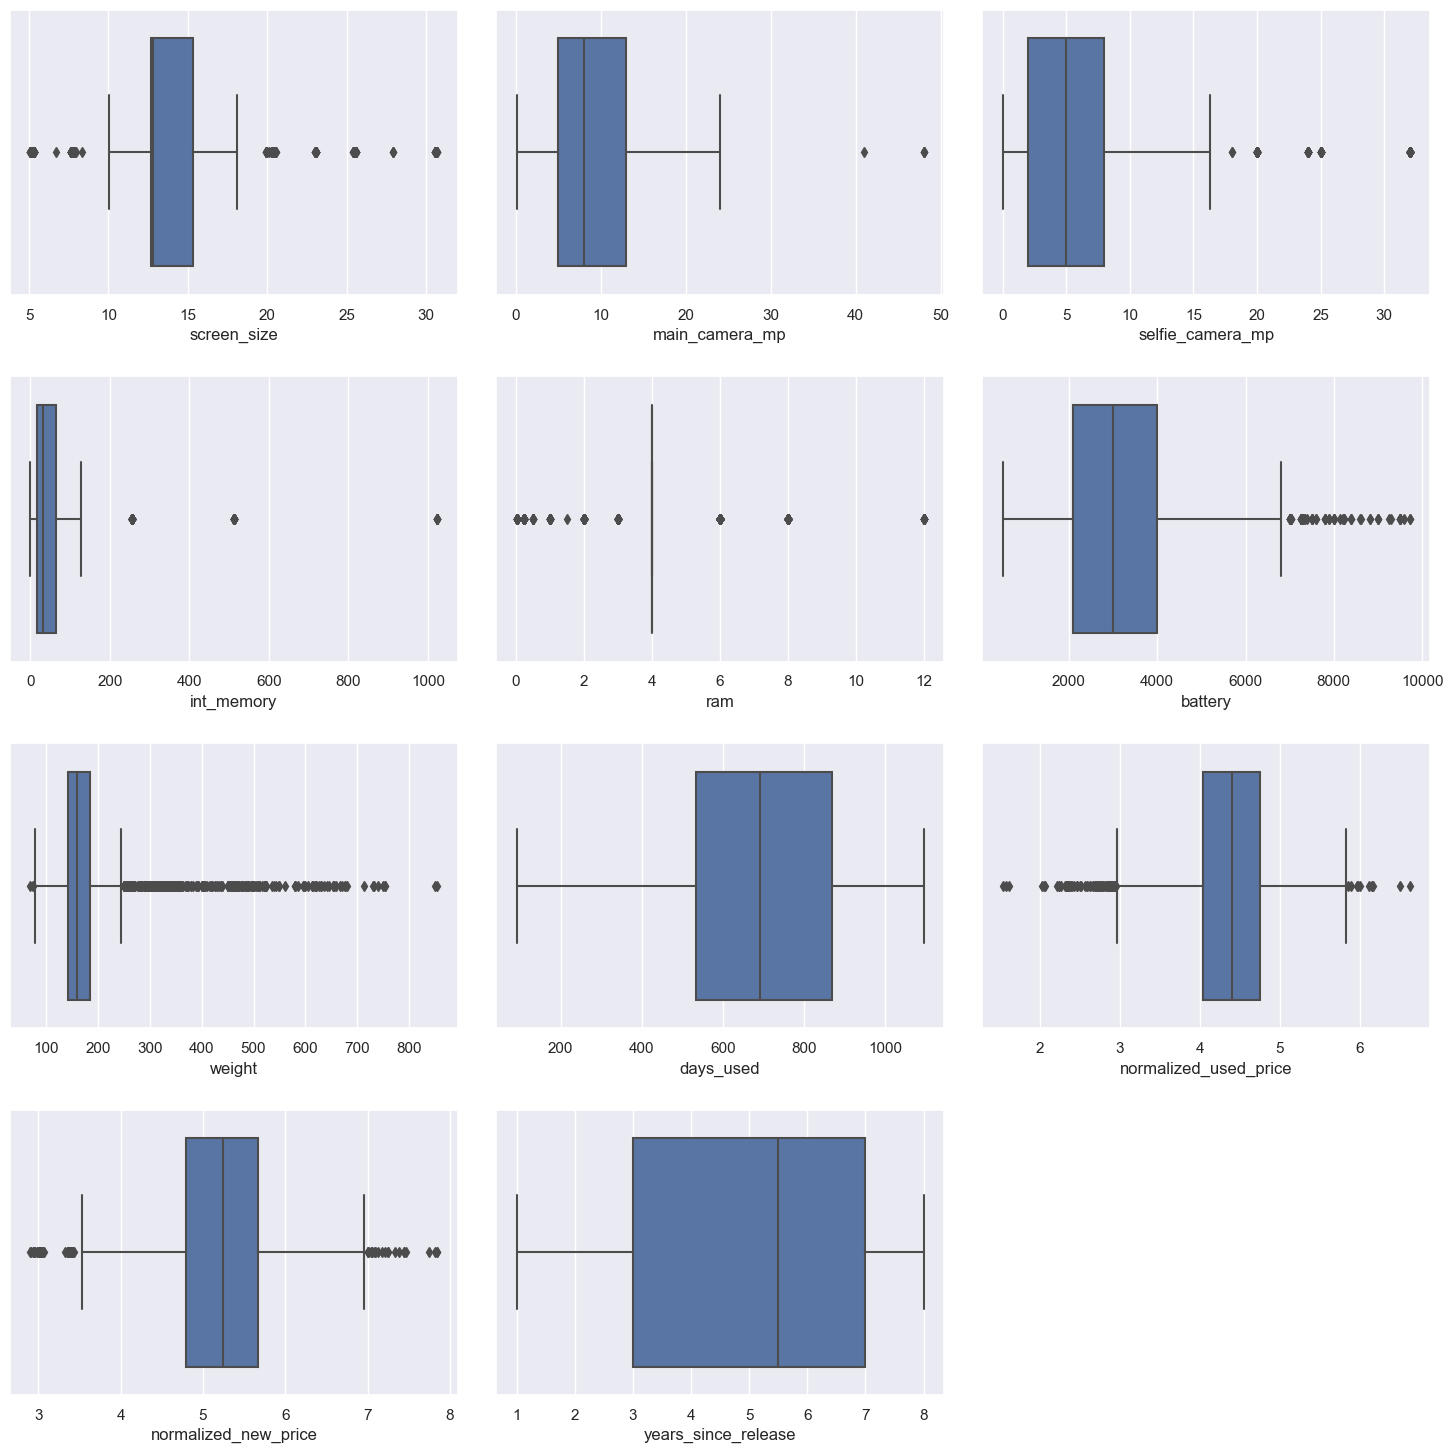

<IPython.core.display.Javascript object>

In [376]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)
    plt.savefig("boxplot_outliers.png", dpi=300, bbox_inches="tight")

* There are no outliers in the days_used and years_since_release columns

* There are a few upper outliers in the screen_size, ram, int_memory,main_camera_mp, selfie_camera_mp and screen_size columns. There are more than a few lower and upper outliers in the weight, normalized_new_price, normalized_used_price, battery and weight columns

* We will perform flooring and capping to remove these outliers and build our model

In [393]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [394]:
# treating the outliers
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, num_cols)

<IPython.core.display.Javascript object>

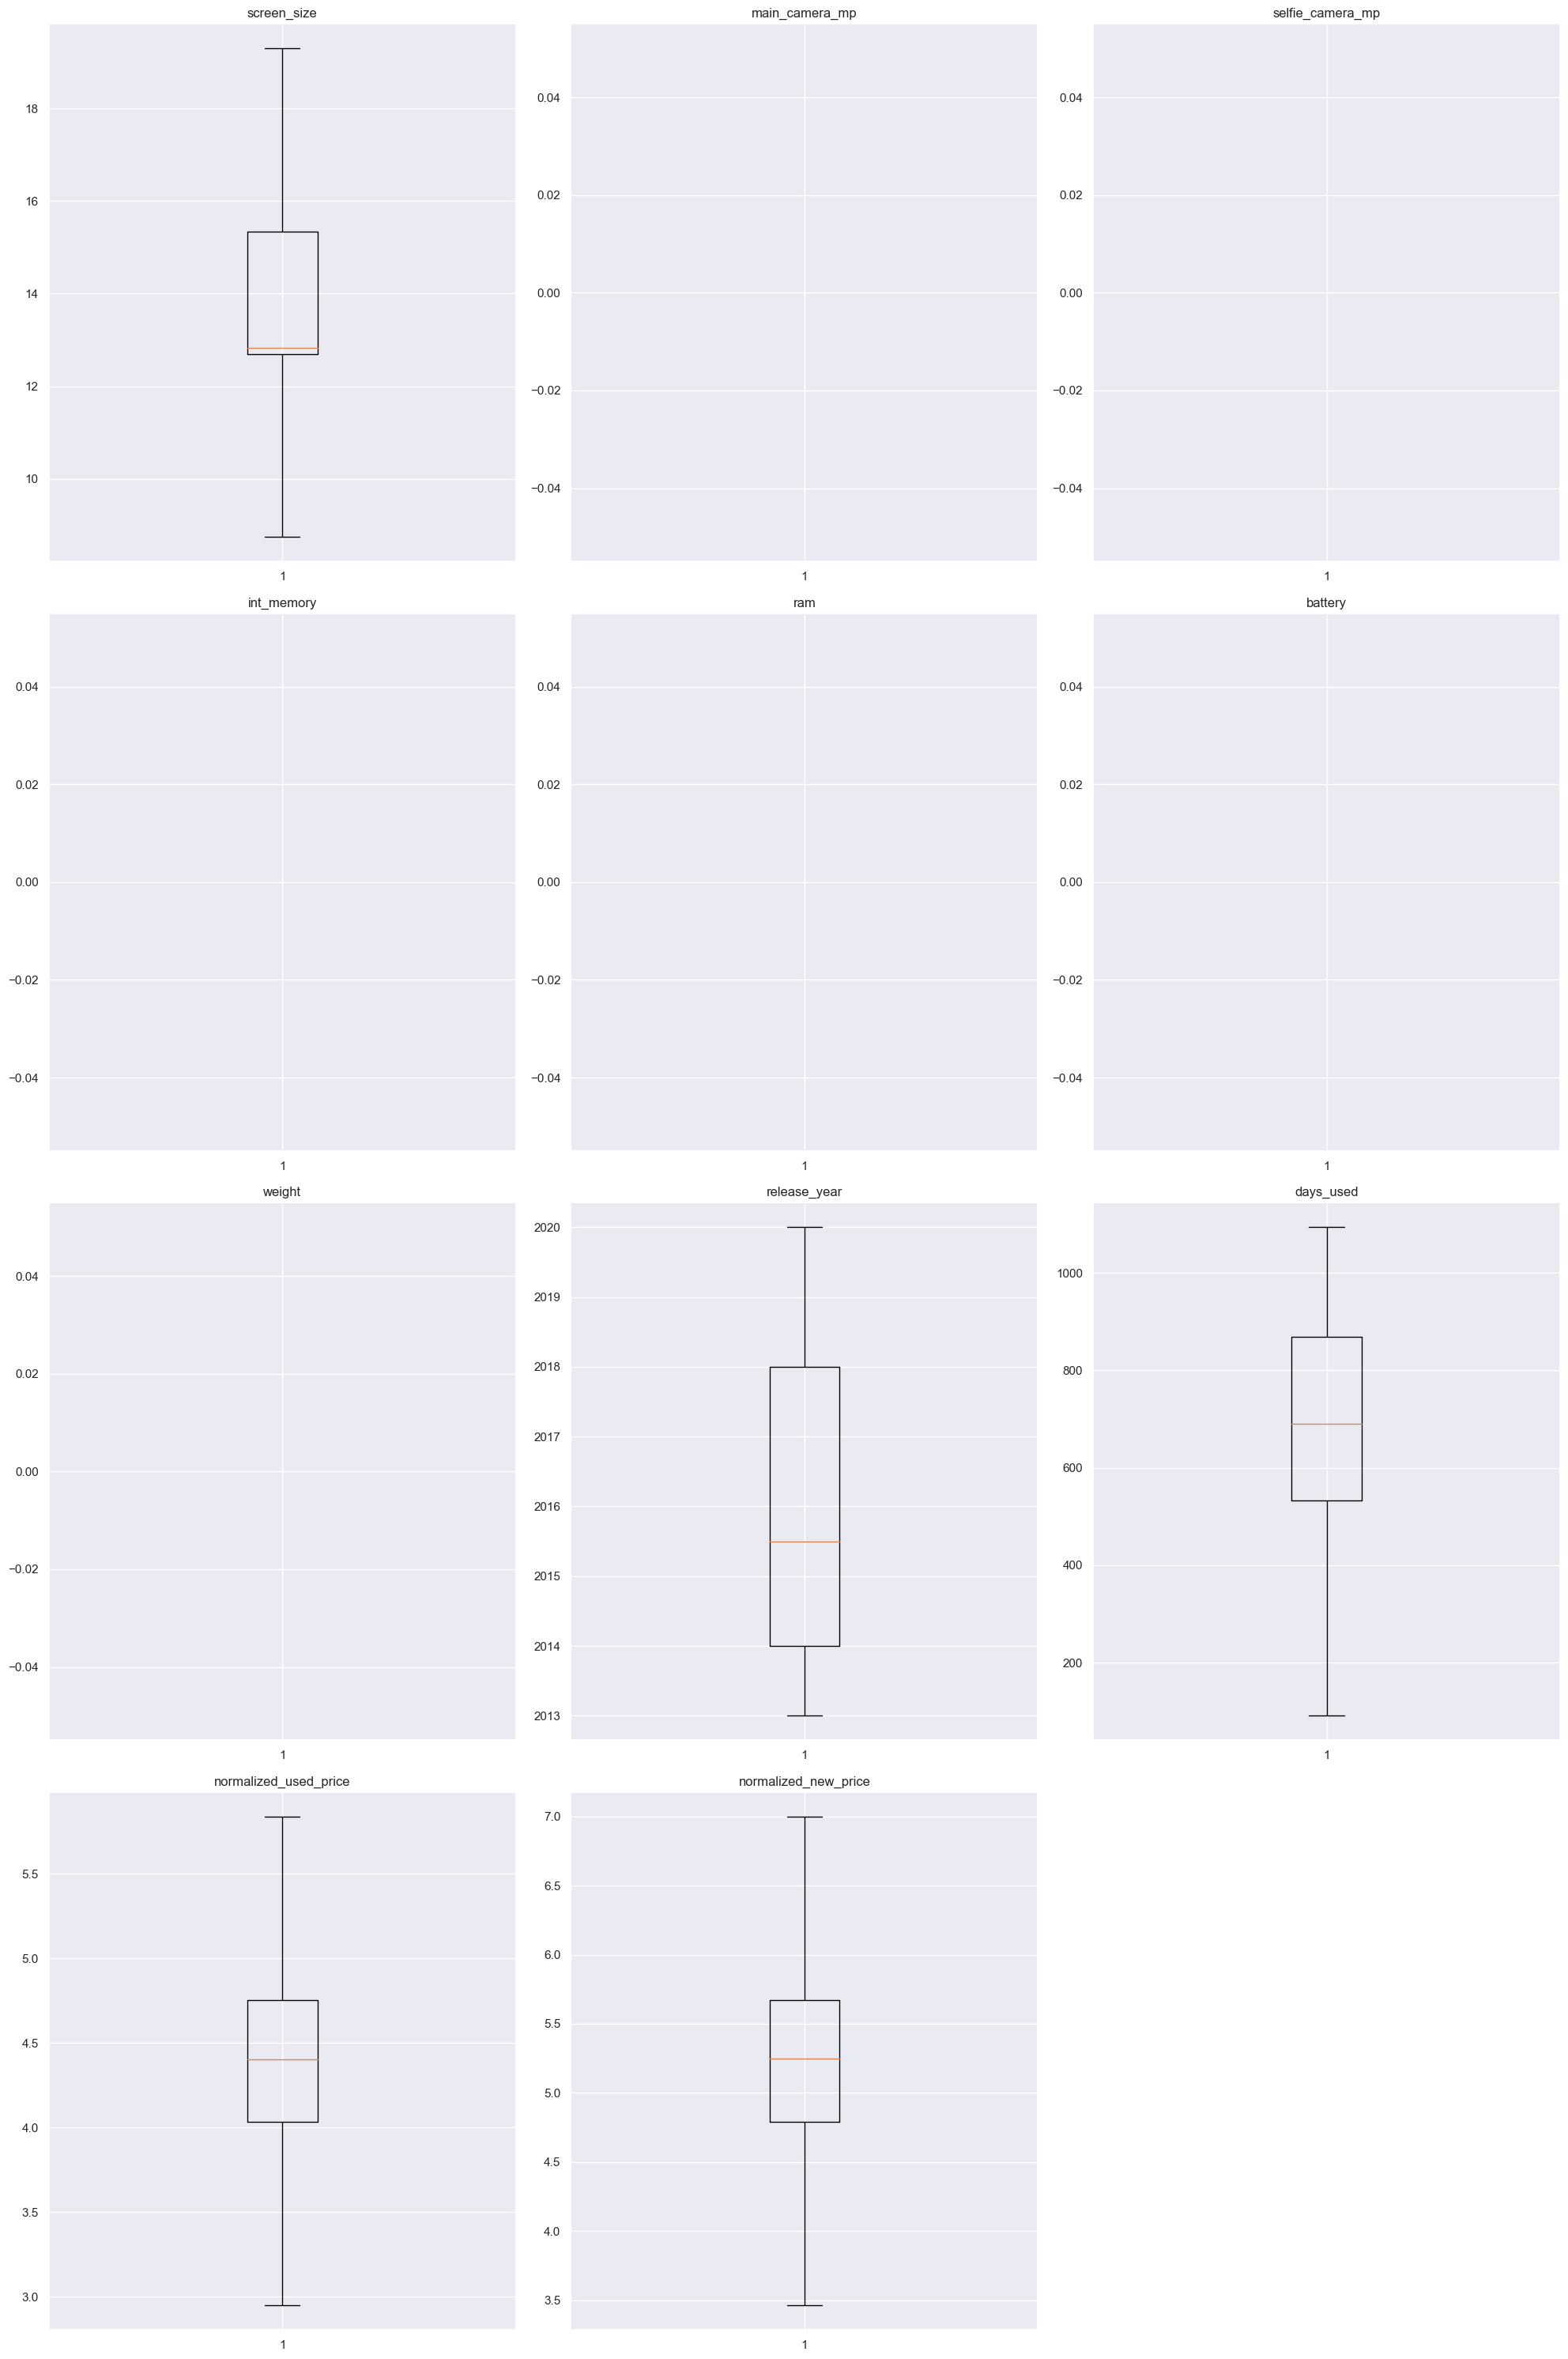

<IPython.core.display.Javascript object>

In [395]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    plt.savefig("boxplot_outliers_after_treatment.png", dpi=300, bbox_inches="tight")

#### Relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

In [298]:
df_largebatteries = df[df["battery"] > 4500]
print(df_largebatteries.shape)

(341, 15)


<IPython.core.display.Javascript object>

* There are 346 refurbished phones with large batteries (i.e. >4500 mAh)

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [299]:
## Complete the code to define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

<IPython.core.display.Javascript object>

In [300]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [301]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features
print(X.shape)
X.head()

(3454, 47)


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_not_Android,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [302]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)  ## Complete the code to split the data into train and test in specified ratio

<IPython.core.display.Javascript object>

In [303]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression


In [377]:
olsmodel1 = sm.OLS(y_train, x_train).fit()  ## Complete the code to fit OLS model
print(olsmodel1.summary())
plt.savefig("OLSmodel1.png", dpi=300, bbox_inches="tight")

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.6
Date:                   Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                           09:27:16   Log-Likelihood:                 123.68
No. Observations:                   2417   AIC:                            -153.4
Df Residuals:                       2370   BIC:                             118.8
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [305]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [306]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2299,0.180312,0.844864,0.841786,4.326774


<IPython.core.display.Javascript object>

In [307]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)  ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238391,0.184803,0.842435,0.834947,4.503298


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [308]:
# Let's define a function to check VIF.


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [309]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,214.942331
1,screen_size,7.277747
2,main_camera_mp,2.281381
3,selfie_camera_mp,2.795717
4,int_memory,1.363848
5,ram,2.208431
6,battery,4.053615
7,weight,6.243552
8,days_used,2.655751
9,normalized_new_price,3.099099


<IPython.core.display.Javascript object>

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [310]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [311]:
col_list = [
    "screen_size",
    "weight",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
]  ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(
    x_train, y_train, col_list
)  ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841919,0.232120
1,brand_name_Others,0.841917,0.232121
2,brand_name_Samsung,0.841884,0.232145
3,weight,0.838183,0.234847
4,screen_size,0.838172,0.234855


<IPython.core.display.Javascript object>

In [312]:
col_to_drop = "brand_name_Huawei"  ## Complete the code to specify the column to drop
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,157.724860
1,screen_size,7.275016
2,main_camera_mp,2.280742
3,selfie_camera_mp,2.792288
4,int_memory,1.362255
5,ram,2.208426
6,battery,4.052597
7,weight,6.243480
8,days_used,2.655070
9,normalized_new_price,3.098729


<IPython.core.display.Javascript object>

In [313]:
col_to_drop = (
    "brand_name_Huawei",
    "brand_name_Others",
)  ## Complete the code to specify the column to drop
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('brand_name_Huawei', 'brand_name_Others')


,feature,VIF
0,const,141.962350
1,screen_size,7.186947
2,main_camera_mp,2.278602
3,selfie_camera_mp,2.782041
4,int_memory,1.361905
5,ram,2.206405
6,battery,4.047871
7,weight,6.184334
8,days_used,2.655040
9,normalized_new_price,3.098268


<IPython.core.display.Javascript object>

In [314]:
col_to_drop = (
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
)  ## Complete the code to specify the column to drop
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung')


,feature,VIF
0,const,141.310424
1,screen_size,7.186842
2,main_camera_mp,2.262919
3,selfie_camera_mp,2.774964
4,int_memory,1.359703
5,ram,2.206329
6,battery,4.042934
7,weight,6.178056
8,days_used,2.655011
9,normalized_new_price,3.039479


<IPython.core.display.Javascript object>

In [315]:
col_to_drop = (
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "screen_size",
)  ## Complete the code to specify the column to drop
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'screen_size')


,feature,VIF
0,const,127.293775
1,main_camera_mp,2.258785
2,selfie_camera_mp,2.773048
3,int_memory,1.357296
4,ram,2.201898
5,battery,3.811427
6,weight,2.983844
7,days_used,2.645211
8,normalized_new_price,2.979495
9,years_since_release,4.722305


<IPython.core.display.Javascript object>

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [316]:
# initial list of columns
predictors = (
    x_train2.copy()
)  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Microsoft', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_not_Android', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [317]:
x_train3 = x_train2[
    selected_features
]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = x_test2[
    selected_features
]  ## Complete the code to specify the test data from which to select the specified columns

<IPython.core.display.Javascript object>

In [378]:
olsmodel2 = sm.OLS(
    y_train, x_train3
).fit()  ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())
plt.savefig("OLSmodel2.png", dpi=300, bbox_inches="tight")

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     835.3
Date:                   Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                           09:27:50   Log-Likelihood:                 80.236
No. Observations:                   2417   AIC:                            -128.5
Df Residuals:                       2401   BIC:                            -35.83
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [319]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(
    olsmodel1, x_train, y_train
)  ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2299,0.180312,0.844864,0.841786,4.326774


<IPython.core.display.Javascript object>

In [380]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)  ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238391,0.184803,0.842435,0.834947,4.503298


<IPython.core.display.Javascript object>

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [321]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.860511,0.226977
1525,4.448399,4.645695,-0.197295
1128,4.315353,4.282477,0.032875
3003,4.282068,4.185717,0.096351
2907,4.456438,4.482911,-0.026473


<IPython.core.display.Javascript object>

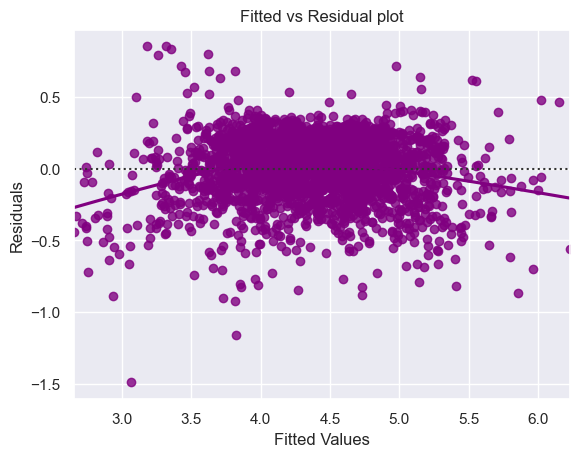

<IPython.core.display.Javascript object>

In [381]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.savefig("residplot_fitted vs residual.png", dpi=300, bbox_inches="tight")

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

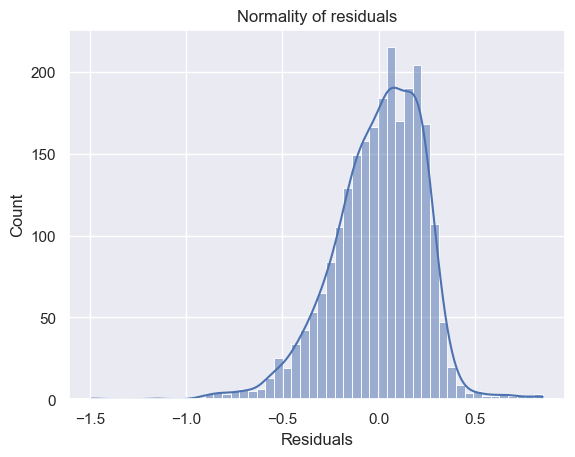

<IPython.core.display.Javascript object>

In [382]:
sns.histplot(
    data=df_pred, x="Residuals", kde=True
)  ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.savefig("Normality of residuals.png", dpi=300, bbox_inches="tight")

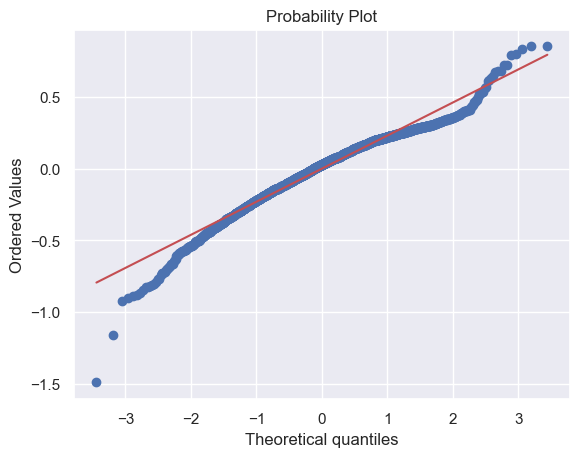

<IPython.core.display.Javascript object>

In [383]:
import pylab
import scipy.stats as stats

stats.probplot(
    df_pred["Residuals"], dist="norm", plot=pylab
)  ## Complete the code check Q-Q plot
plt.savefig("probability plot.png", dpi=300, bbox_inches="tight")

In [325]:
stats.shapiro(
    df_pred["Residuals"]
)  ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.968555748462677, pvalue=1.3796865474485753e-22)

<IPython.core.display.Javascript object>

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [326]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(
    df_pred["Residuals"], x_train3
)  ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.01667630253455), ('p-value', 0.38762657199753797)]

<IPython.core.display.Javascript object>

* the error term does not vary much as the value of the predictor variable changes

In [388]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test ** (3), "Predicted": pred ** (3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1995,95.239957,84.039540
2341,50.493131,63.853585
1913,46.349258,48.054753
688,79.867798,68.624282
650,92.475076,132.067152
2291,77.270339,84.705730
40,124.826465,162.371902
1884,58.201721,66.220594
2538,74.439469,67.164871
45,155.759967,142.134813


<IPython.core.display.Javascript object>

## Final Model Summary

In [384]:
olsmodel_final = sm.OLS(
    y_train, x_train3
).fit()  ## Complete the code to fit the final model
print(olsmodel_final.summary())
plt.savefig("OLSmodel_final.png", dpi=300, bbox_inches="tight")

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     835.3
Date:                   Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                           09:32:02   Log-Likelihood:                 80.236
No. Observations:                   2417   AIC:                            -128.5
Df Residuals:                       2401   BIC:                            -35.83
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [328]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel1, x_train, y_train
)  ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2299,0.180312,0.844864,0.841786,4.326774


<IPython.core.display.Javascript object>

In [329]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)  ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238391,0.184803,0.842435,0.834947,4.503298


<IPython.core.display.Javascript object>

##  Actionable Insights and Recommendations

* The used and refurbished device market has grown considerably over the past decade.

* Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market.

* Exploratory analysis of the data show that expensive brands have the maximum number of refurbished phones with large screen size and better selfie camera compared to cheaper brands.

* After analyzing the data, we can see that main camera, selfie camera, screen size, weight and normalized new price are significant parameters in predicting used price. 

* An increment of any of the above is expected to increase the used price for the device, as indicated by the positive coefficients for these parameters in a multivariate regression model.

* Post exploratory data processing also indicated high_brand (i.e., expensive brands) have the maximum number of refurbished phones with large screen_size and better selfie_camera and low_brand (i.e, cheaper brands) have the lowest number of such refurbished phones, thereby reaffirming the validity of the model. Definitely it is a good idea for the company to invest on high_brand phones more.

* Almost 93% of phones were found to be operating on Android operating system, also an significant factor for prediction.

* The linear predictive model is able to predict ~84% of the variance in the data, within a mean absolute percentage error of ~4.5%. Considering these we can say the model is good. We should strongly consider the parameters suggest by the model for deciding the price.

* All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs<5, normality of error terms and homoscedasticity. While the independence and linearity assumption can be assumed met after suitable transformation/data preprocessing, the data gave the impression that non-linear models may be more suited for prediction

---------